In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path 
from PIL import Image

In [2]:
df = pd.read_csv("../data/Subset-Chexchonet/prototype.csv")
df.head()

,patient_id,cxr_filename,cxr_time_offset,cxr_year,cxr_path,cxr_pixel_spacing_x,cxr_pixel_spacing_y,age,sex,ivsd,lvpwd,lvidd,slvh,dlv,composite_slvh_dlv,heart_transplant,lung_transplant,pacemaker_or_icd
0,eb10cb476941241dbb75813b7f64dfe2,eb10cb476941241dbb75813b7f64dfe2_ff245bd7.jpg,5382 days 12:59:54.445138,2015,./cxrs/eb10cb476941241dbb75813b7f64dfe2_ff245b...,0.194556,0.194556,81,M,1.17195,1.14796,5.02479,0,0,0,0,0,0
1,2a6d9607baaf6454f803d710b738b63a,2a6d9607baaf6454f803d710b738b63a_b38d3815.jpg,2776 days 16:21:47.077348,2014,./cxrs/2a6d9607baaf6454f803d710b738b63a_b38d38...,0.194556,0.194556,80,M,1.46267,1.41954,5.91983,0,1,1,0,0,0
2,810a6cf5bcf760a2b0849fd06efb464a,810a6cf5bcf760a2b0849fd06efb464a_70ed7390.jpg,1048 days 11:08:45.747607,2013,./cxrs/810a6cf5bcf760a2b0849fd06efb464a_70ed73...,0.194556,0.194556,74,F,1.32593,1.22204,5.48781,0,1,1,0,0,0
3,e3a9d70175bfe016ef758250fc86acfd,e3a9d70175bfe016ef758250fc86acfd_681e7eef.jpg,4067 days 23:18:57.419718,2018,./cxrs/e3a9d70175bfe016ef758250fc86acfd_681e7e...,0.194549,0.194549,53,M,1.42248,1.57136,4.83946,1,0,1,0,0,0
4,979ecb5ed9081d1db7f4f017ad4e62cd,979ecb5ed9081d1db7f4f017ad4e62cd_89885346.jpg,2637 days 22:29:08.560181,2016,./cxrs/979ecb5ed9081d1db7f4f017ad4e62cd_898853...,0.194556,0.194556,63,F,1.41174,1.33852,4.70509,1,0,1,0,1,0


In [3]:
print("Unique patients:", df['cxr_filename'].nunique())
print("Total images:", len(df))

Unique patients: 3000
Total images: 3000


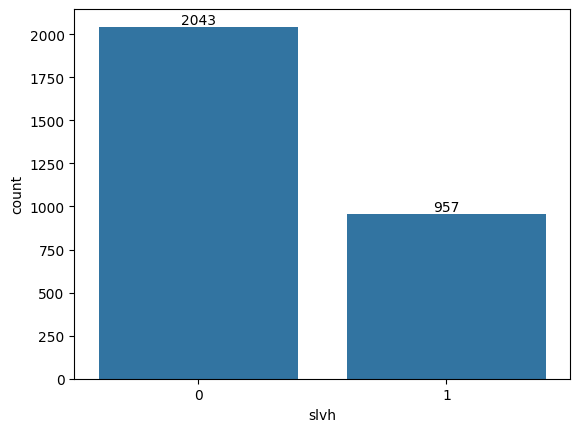

In [4]:
ax = sns.countplot(data=df, x='slvh')
ax.bar_label(ax.containers[0])
plt.show()

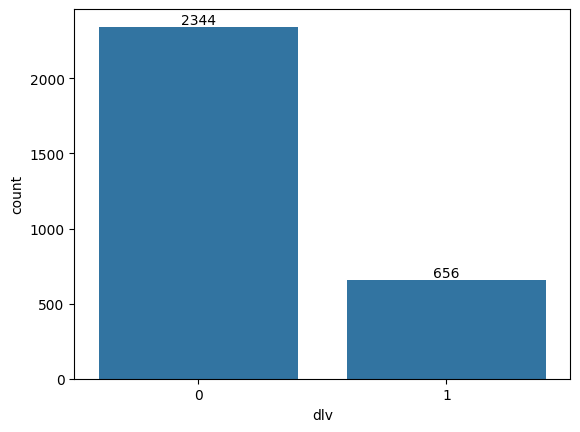

In [5]:
ax = sns.countplot(data=df, x='dlv')
ax.bar_label(ax.containers[0])
plt.show()

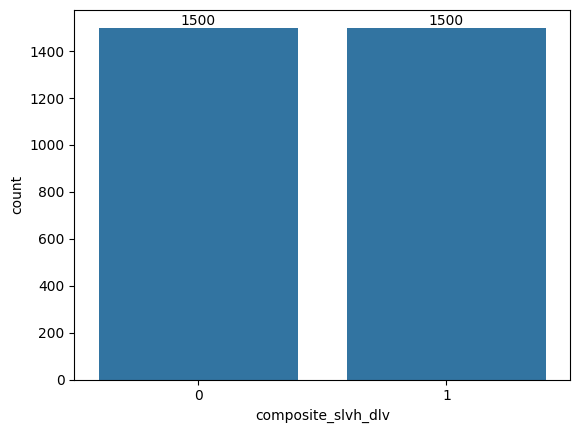

In [6]:
ax = sns.countplot(data=df, x='composite_slvh_dlv')
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
df['composite_slvh_dlv'].value_counts()


composite_slvh_dlv
0    1500
1    1500
Name: count, dtype: int64

In [8]:
img_path = df['cxr_filename'].iloc[0]
img = Image.open(Path("../data/Subset-Chexchonet/images/") / img_path)
print(img.size, img.mode)

(224, 224) L


In [9]:
df.isnull().sum()

patient_id             0
cxr_filename           0
cxr_time_offset        0
cxr_year               0
cxr_path               0
cxr_pixel_spacing_x    0
cxr_pixel_spacing_y    0
age                    0
sex                    0
ivsd                   0
lvpwd                  0
lvidd                  0
slvh                   0
dlv                    0
composite_slvh_dlv     0
heart_transplant       0
lung_transplant        0
pacemaker_or_icd       0
dtype: int64

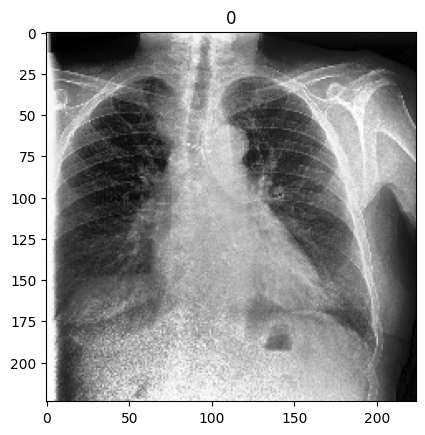

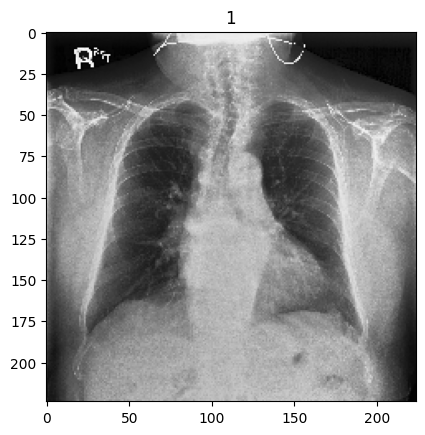

In [10]:
from matplotlib import pyplot as plt

for label in df['composite_slvh_dlv'].unique():
    sample_path = df[df['composite_slvh_dlv']==label]['cxr_filename'].iloc[0]
    img = Image.open(Path("../data/Subset-Chexchonet/images/") / sample_path)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.show()


<Axes: xlabel='composite_slvh_dlv', ylabel='age'>

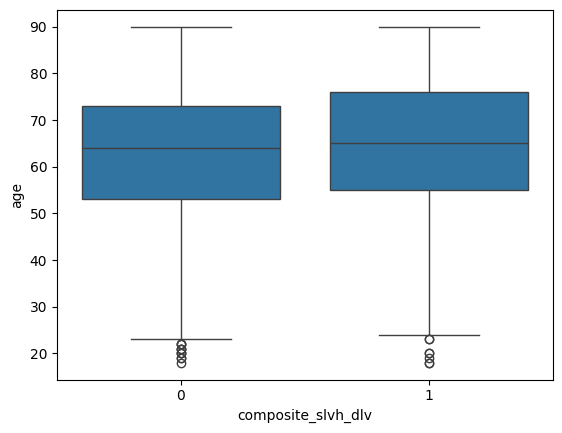

In [11]:
sns.boxplot(data=df, x='composite_slvh_dlv', y='age')


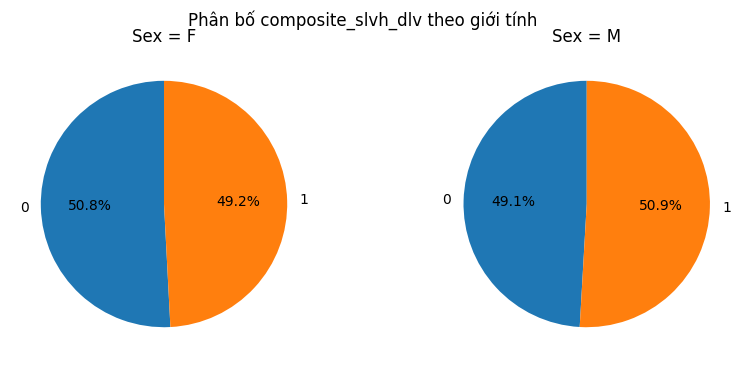

In [12]:
# Tạo crosstab đã normalize
ct = pd.crosstab(df['sex'], df['composite_slvh_dlv'], normalize='index')

# Vẽ pie chart cho từng giới tính
fig, axes = plt.subplots(1, len(ct), figsize=(10, 4))

for i, sex in enumerate(ct.index):
    axes[i].pie(ct.loc[sex], labels=ct.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Sex = {sex}")

plt.suptitle("Phân bố composite_slvh_dlv theo giới tính")
plt.show()
